<a href="https://www.kaggle.com/code/diamondhavard/abroad-study-cost-eda-p-modeling?scriptVersionId=202473046" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Neccessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings(action = 'ignore')

# Loading the Dataset

In [2]:
data = pd.read_csv('/kaggle/input/abroad-study-cost-predictor/abroad  - Sheet1.csv')

# Sanity check

In [3]:
# to get the dimensions of data
data.shape

(489, 4)

In [4]:
# to get first five rows
data.head(5)

,COUNTRY,COURSE TYPE,COURSE (SPECIALIZATION),FEES
0,GERMANY,MBA,MBA in Sales & Marketing,3678127.31
1,GERMANY,MBA,MBA in Banking,1253594.37
2,GERMANY,MBA,MBA in Business Administration,454540.69
3,GERMANY,MBA,MBA in Hospital/Healthcare Management,3246719.22
4,GERMANY,MBA,MBA in Human Resource Management,1217519.71


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   COUNTRY                  489 non-null    object
 1   COURSE TYPE              489 non-null    object
 2   COURSE (SPECIALIZATION)  489 non-null    object
 3   FEES                     489 non-null    object
dtypes: object(4)
memory usage: 15.4+ KB


In [6]:
# Let's Convert the cleaned column to numeric
data['FEES'] = pd.to_numeric(data['FEES'], errors='coerce')

In [7]:
# check for missing values
data.isnull().sum()

COUNTRY                    0
COURSE TYPE                0
COURSE (SPECIALIZATION)    0
FEES                       1
dtype: int64

In [8]:
# Let's drop the nnull value
data.dropna(inplace = True)

# EDA

In [9]:
# descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
FEES,488.0,2.958527e+06,2.857511e+07,45445.0,852669.9525,1389199.23,2257028.455,632314312.0


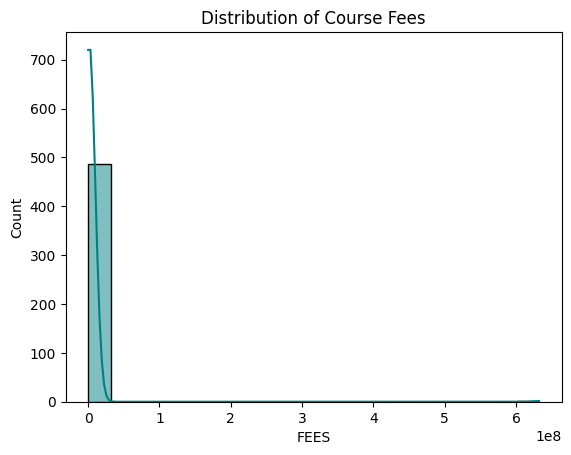

In [10]:
sns.histplot(data['FEES'], bins=20, kde=True, color = 'teal')
plt.title('Distribution of Course Fees')
plt.show()

# Number of Courses by Country

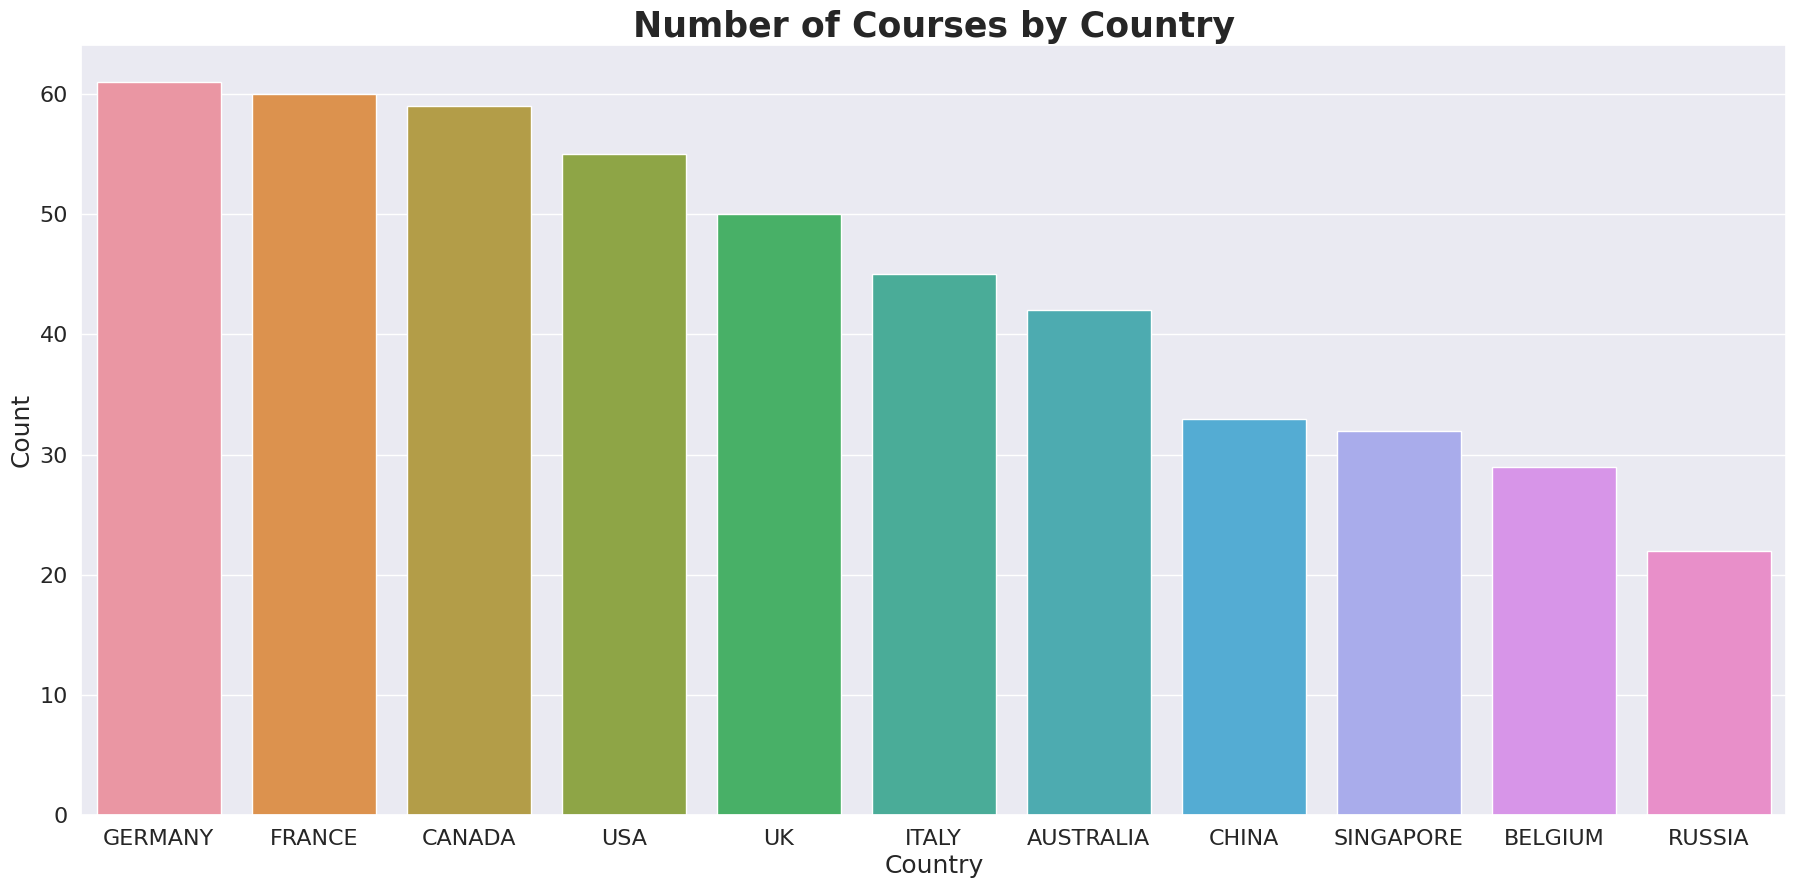

In [11]:
sns.set(rc = {'figure.figsize':(22,10)})
sns.countplot(data = data, x = 'COUNTRY', order = data['COUNTRY'].value_counts().index)
plt.title('Number of Courses by Country', fontweight = 'bold', fontsize = 25)
plt.xlabel( 'Country',fontsize = 18)
plt.ylabel( 'Count',fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

# Distribution of Course Types

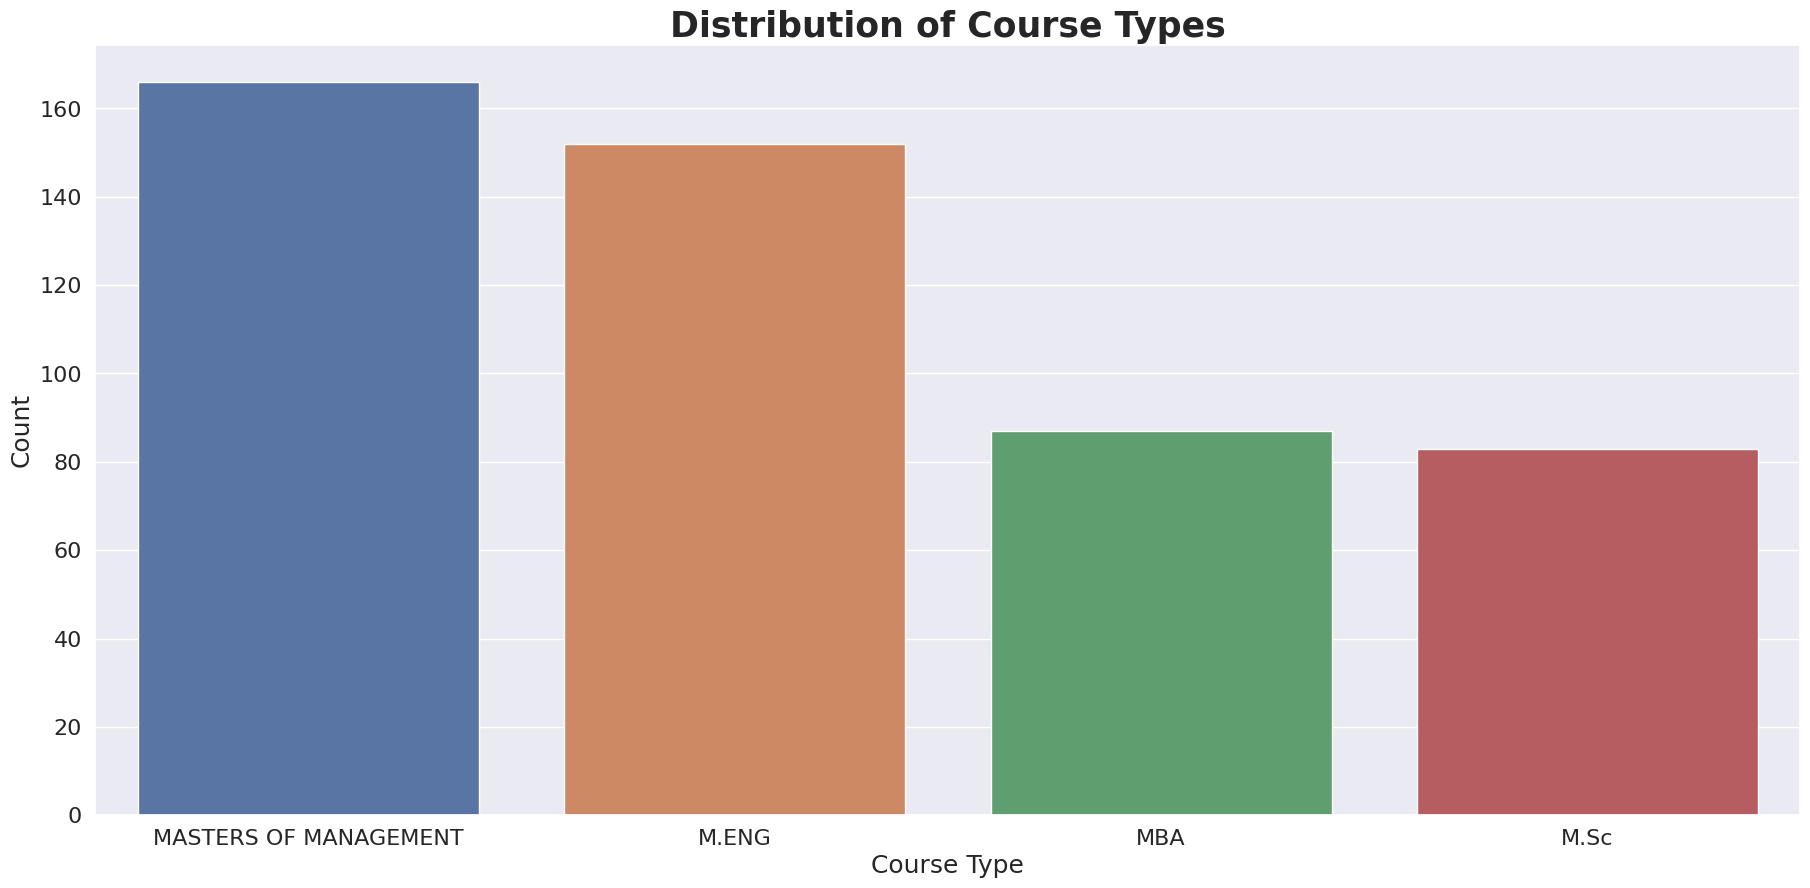

In [12]:
sns.countplot(data = data, x = 'COURSE TYPE', order = data['COURSE TYPE'].value_counts().index)
plt.title('Distribution of Course Types',fontweight = 'bold', fontsize = 25)
plt.xlabel( 'Course Type',fontsize = 18)
plt.ylabel( 'Count',fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

# Course Fees Distribution by Country

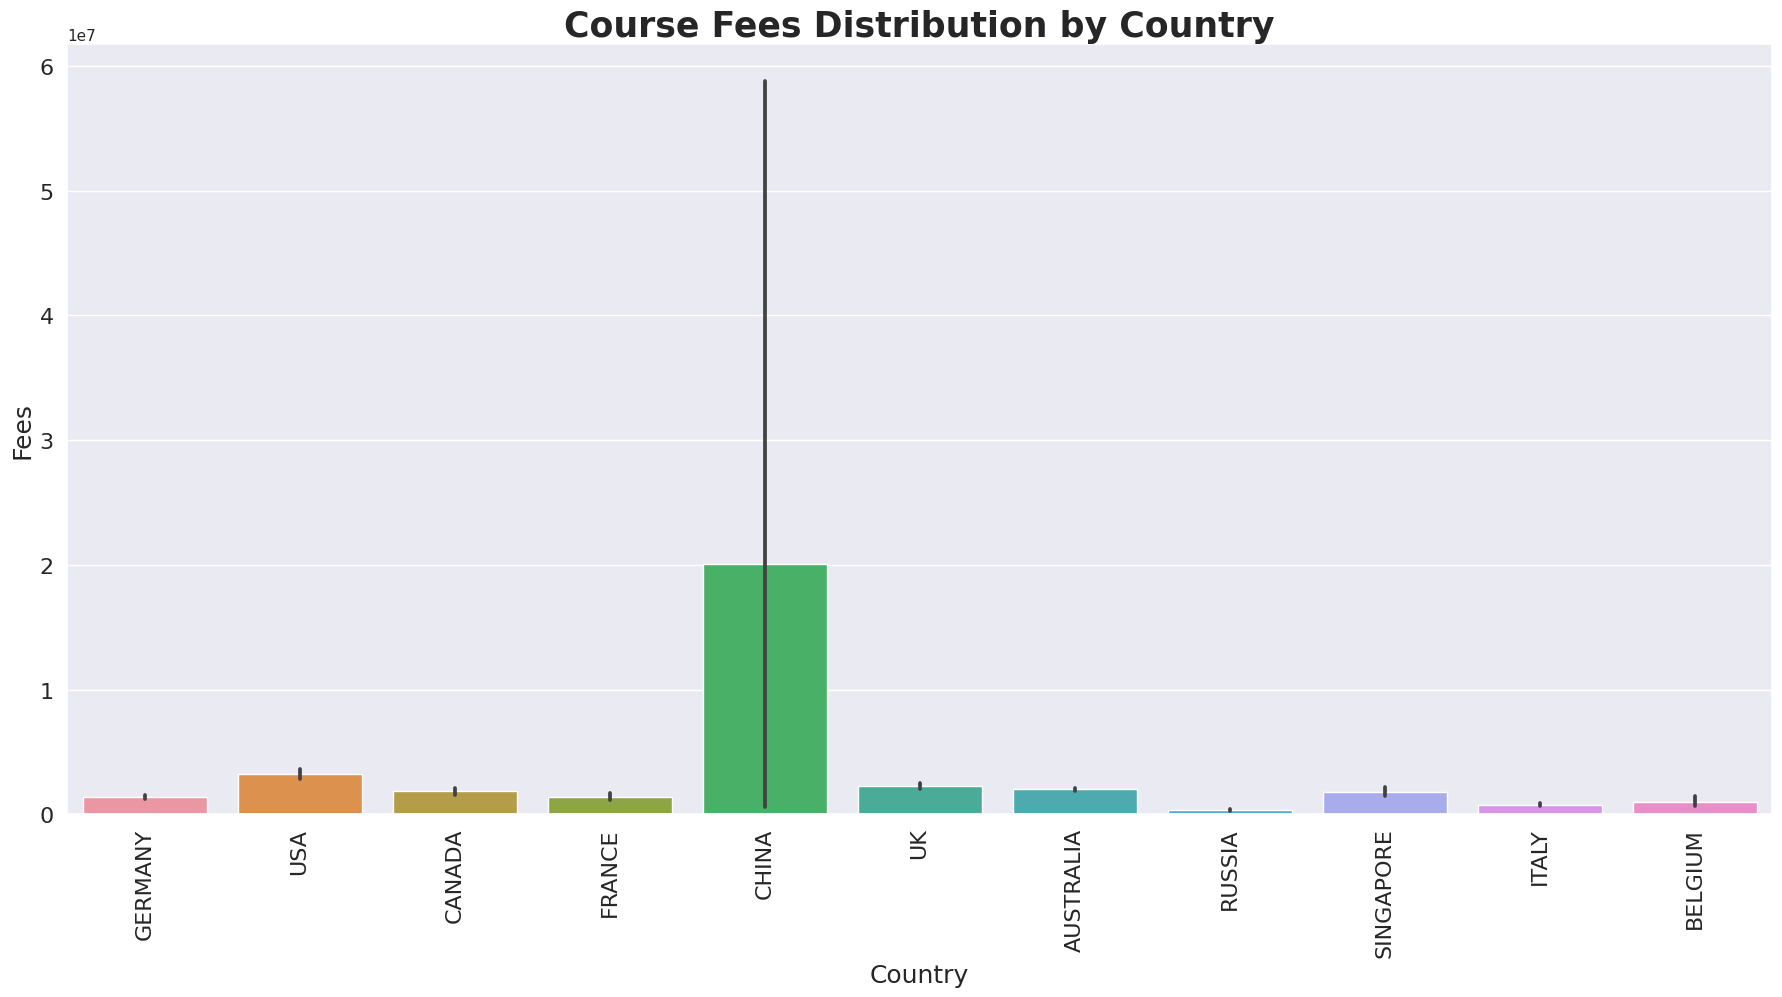

In [13]:
sns.barplot(x = 'COUNTRY', y = 'FEES', data = data)
plt.title('Course Fees Distribution by Country',fontweight = 'bold', fontsize = 25)
plt.xlabel( 'Country',fontsize = 18)
plt.ylabel( 'Fees',fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xticks(rotation = 90)
plt.show()

# Course Fees by Course Type

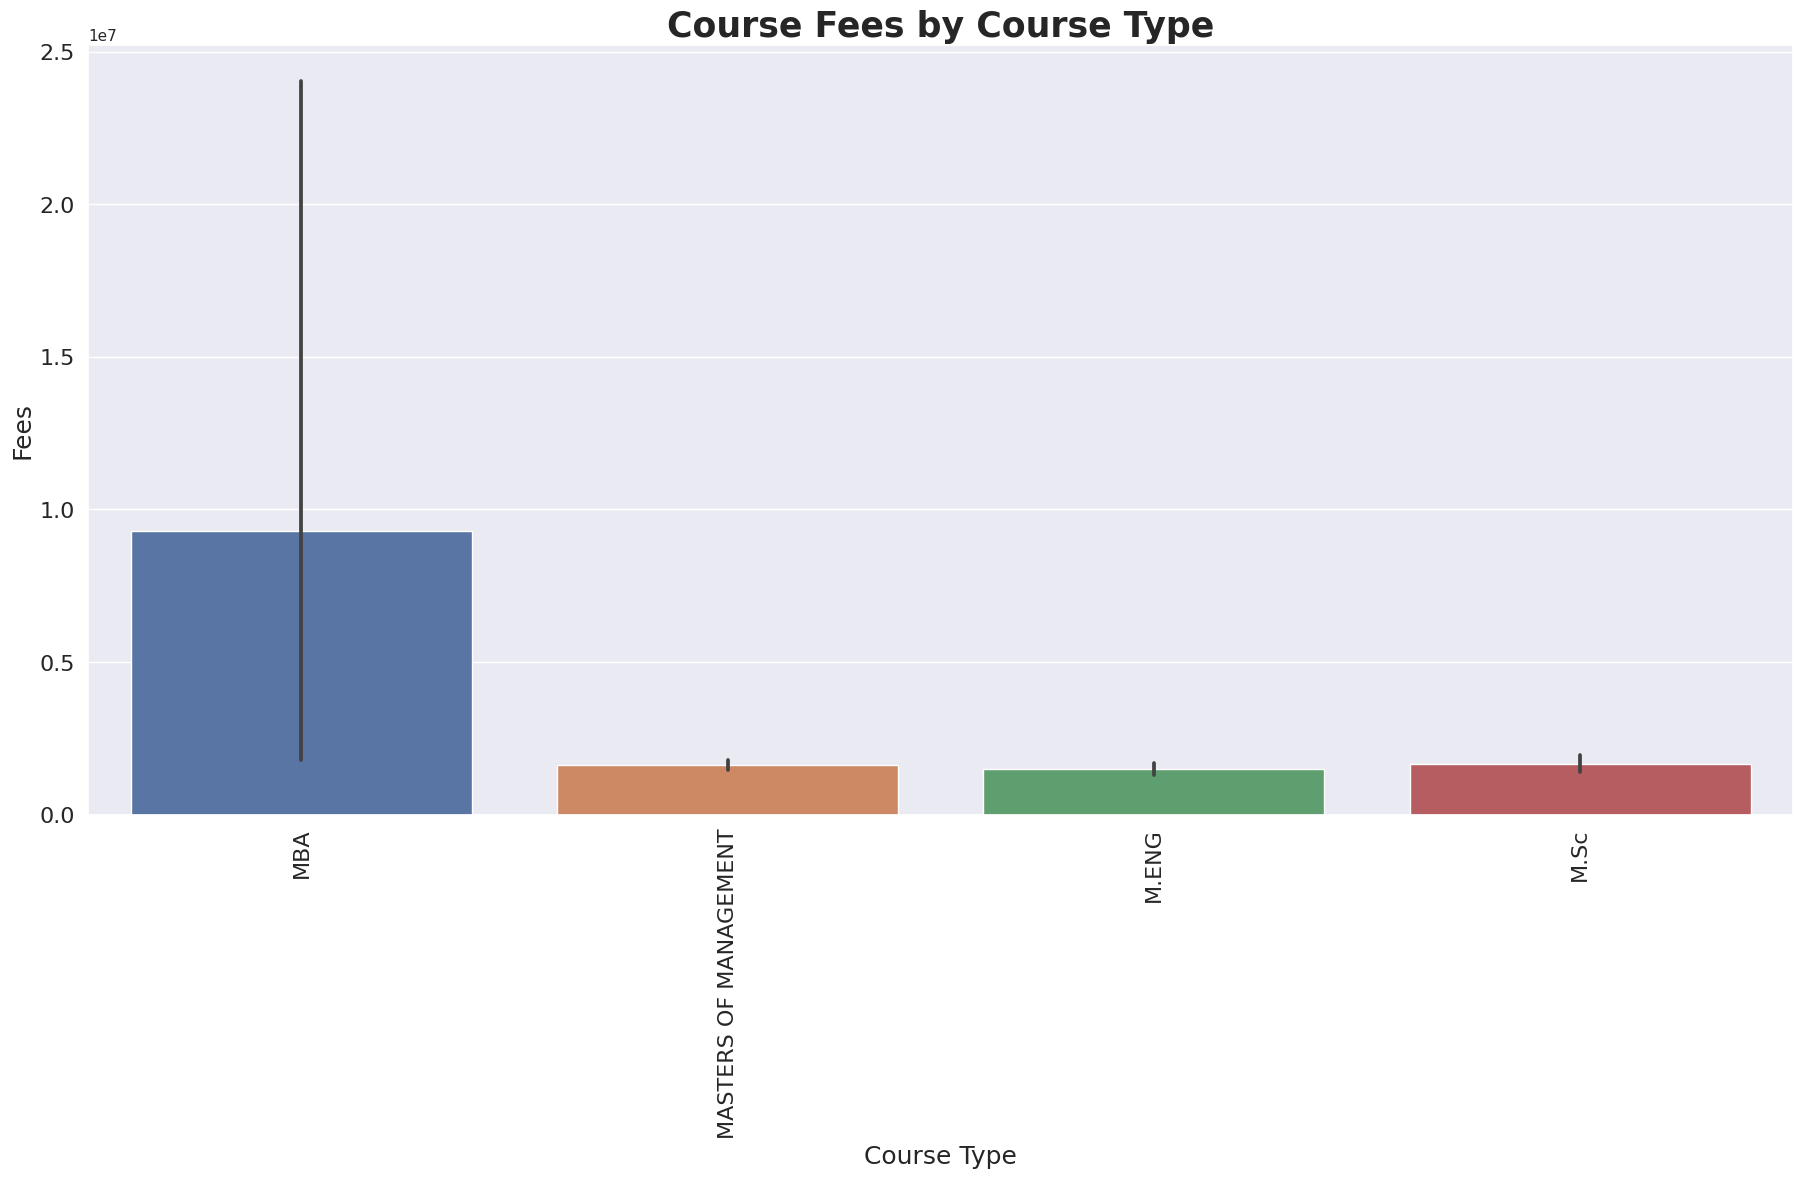

In [14]:
sns.barplot(x = 'COURSE TYPE', y = 'FEES', data = data)
plt.title('Course Fees by Course Type',fontweight = 'bold', fontsize = 25)
plt.xlabel( 'Course Type',fontsize = 18)
plt.ylabel( 'Fees',fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xticks(rotation = 90)
plt.xticks(rotation=90)
plt.show()

# Predictive Modeling

In [15]:
# Encoding Categorical Variables
# One-hot encode the categorical variables
data_encoded = pd.get_dummies(data, columns=['COUNTRY', 'COURSE TYPE', 'COURSE (SPECIALIZATION)'], drop_first=True)

In [16]:
# Split the data into features (X) and target (y)
X = data_encoded.drop(columns='FEES')  # Features
y = data_encoded['FEES']  # Target (fees)

In [17]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buiding a Regression Model

In [18]:
# Initialize the model
lr_model = LinearRegression()

In [19]:
# Train the model
lr_model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

In [21]:
# Evaluate the model
print('Linear Regression Results:')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred_lr)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_lr)}')
print(f'R-squared: {r2_score(y_test, y_pred_lr)}')

Linear Regression Results:
Mean Absolute Error: 6.915522573621326e+16
Mean Squared Error: 3.868847663296172e+34
R-squared: -1.3919810166850073e+22
